<a href="https://colab.research.google.com/github/yjyjy131/Deep-learning-from-scratch/blob/main/chapter_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 손글씨 숫자 인식

In [1]:
from keras.datasets import mnist

In [5]:
from matplotlib.pyplot import imshow

In [4]:
import numpy as np

In [39]:
import pickle

#### 데이터  확인

In [24]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [13]:
train_X.shape[0]

60000

In [8]:
# 책과 같은 차원으로 reshape
train_X = train_X.reshape(60000, 784)
test_X = test_X.reshape(10000, 784)

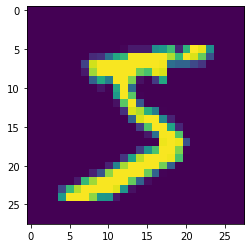

In [9]:
imshow(train_X[0].reshape(28, 28))

#### 네트워크 학습 및 테스트

In [32]:
# mnist 데이터를 입력층에 맞는 사이즈로 변환하여 리턴
def get_flatten_data():
  (train_x, train_y), (test_x, test_y) = mnist.load_data()

  train_resize = (train_x.shape[0], train_x.shape[1] * train_x.shape[1])
  test_resize = (test_x.shape[0], test_x.shape[1] * test_x.shape[1])

  train_x = train_x.reshape(train_resize[0], train_resize[1])
  test_x = test_x.reshape(test_resize[0], test_resize[1])
  return train_x, train_y, test_x, test_y

In [37]:
# 네트워크 가중치 리턴
def init_network():
  with open("sample_weight.pkl", "rb") as f :
    network = pickle.load(f)
  
  return network

In [61]:
# 시그모이드 활성화 함수
def sigmoid(x) :
  y = 1 / ( 1 + np.exp(-x) )
  return y 

In [62]:
# 결과 예측
def predict(network, x) :
  w1, w2, w3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, w1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, w2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, w3) + b3
  y = sigmoid(a3)

  return y

#### 배치 없는 predict

In [82]:
# test
train_x, train_y, test_x, test_y = get_flatten_data()
network = init_network()

acc_cnt = 0

for i in range(len(test_x)) :
  y = predict(network, test_x[i])

  # 결과값 y 들 중에서, 가장 확률이 높은 원소의 인덱스 가져옴
  p = np.argmax(y)
  if p == test_y[i] :
    acc_cnt += 1
  
  if i % 500 == 0 :
    print(f'Progress {i}/{len(test_x)}... Acc : {acc_cnt/len(test_x)}')

print(f'Acc : {acc_cnt/len(test_x)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Progress 0/10000... Acc : 0.0001
Progress 500/10000... Acc : 0.0456
Progress 1000/10000... Acc : 0.0909
Progress 1500/10000... Acc : 0.1344
Progress 2000/10000... Acc : 0.1788
Progress 2500/10000... Acc : 0.2242
Progress 3000/10000... Acc : 0.2694
Progress 3500/10000... Acc : 0.3154
Progress 4000/10000... Acc : 0.3597
Progress 4500/10000... Acc : 0.4049
Progress 5000/10000... Acc : 0.4501
Progress 5500/10000... Acc : 0.4977
Progress 6000/10000... Acc : 0.5434
Progress 6500/10000... Acc : 0.5905
Progress 7000/10000... Acc : 0.6367
Progress 7500/10000... Acc : 0.6846
Progress 8000/10000... Acc : 0.731
Progress 8500/10000... Acc : 0.7791
Progress 9000/10000... Acc : 0.8284
Progress 9500/10000... Acc : 0.8762
Acc : 0.9207


#### 배치를 사용한 predict

In [84]:
train_x, train_y, test_x, test_y = get_flatten_data()
network = init_network()

acc_cnt = 0
batch_size = 100

for i in range(0, len(test_x), batch_size) :
  x_batch = test_x[i:i+batch_size]
  y_batch = predict(network, x_batch)

  p = np.argmax(y_batch, axis=1)
  acc_cnt += np.sum(p == test_y[i:i+batch_size])

  if i % 500 == 0 :
    print(f'Progress {i}/{len(test_x)}... Acc : {acc_cnt/len(test_x)}')

print(f'Acc : {acc_cnt/len(test_x)}')

Progress 0/10000... Acc : 0.0096
Progress 500/10000... Acc : 0.0543
Progress 1000/10000... Acc : 0.0997
Progress 1500/10000... Acc : 0.1434
Progress 2000/10000... Acc : 0.1877
Progress 2500/10000... Acc : 0.2333
Progress 3000/10000... Acc : 0.2786
Progress 3500/10000... Acc : 0.3242
Progress 4000/10000... Acc : 0.3687
Progress 4500/10000... Acc : 0.414
Progress 5000/10000... Acc : 0.4589
Progress 5500/10000... Acc : 0.5072
Progress 6000/10000... Acc : 0.5521
Progress 6500/10000... Acc : 0.5989
Progress 7000/10000... Acc : 0.6464
Progress 7500/10000... Acc : 0.6942
Progress 8000/10000... Acc : 0.74
Progress 8500/10000... Acc : 0.7885
Progress 9000/10000... Acc : 0.837
Progress 9500/10000... Acc : 0.8855
Acc : 0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
